<a name = '1'></a>
## 1 - Packages

In [1]:
# Import numpy and pandas libraries to read the data
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from numpy import *
from sklearn.model_selection import train_test_split

%matplotlib inline

<a name = '2'></a>
## 2 - Data and Visualizing

In [2]:
# Load dataset
square = pd.read_csv("training_data.csv")
square

,X,Y
0,0.00,0.0000
1,0.50,0.2500
2,1.00,1.0000
3,1.50,2.2500
4,2.00,4.0000
5,2.25,5.0625
6,3.00,9.0000
7,3.20,10.2400
8,4.00,16.0000
9,4.50,20.2500


In [3]:
# Shape of the training data set
square.shape

(32, 2)

In [4]:
# Describe the dataset
square.describe()

,X,Y
count,32.000000,32.000000
mean,8.417188,103.154141
std,5.774703,115.439105
min,0.000000,0.000000
25%,3.800000,14.560000
50%,7.750000,60.125000
75%,12.250000,150.250000
max,20.000000,400.000000


In [5]:
# Splitting dataset into independent (x) and (y) variables
X = square.iloc[:, 0].values
Y = square.iloc[:, 1].values

# Reshape the dat set
X = X.reshape(square.shape[0], 1) # Dimension: (32, 1)
Y = Y.reshape(square.shape[0], 1) # Dimension: (32, 1)

# Print input and output size
print(X.shape)
print(Y.shape)

(32, 1)
(32, 1)


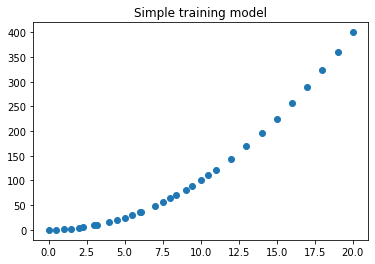

In [6]:
# Visualize the dataset
plt.scatter(X, Y)
plt.title('Simple training model')
plt.show()

## 3 - Performing Deep Learning model

In [7]:
# Create a 2-hidden layer model to predict the data
"""
    Hidden layer #1 has 100 units and uses relu activation function
    Hidden layer #2 has 100 units and uses relu activation function
"""
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Optimize the model using 'mean squared error' loss function and 'Adam' optimizing method
model.compile(loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam(0.01))

model.fit(X, Y, epochs = 1000, verbose = False)

2022-02-08 02:06:07.300717: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-08 02:06:07.301259: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [8]:
# Create a list of predicted output, each element in the list is a 2D numpy array
Y_preds = []
for i in np.linspace(0, 20, 32):
    Y_preds.append(model.predict([i]))

# Convert 3D list (Y_preds) to 2D numpy array
Ypreds_3Dlist = np.array(Y_preds)
Ypreds_2Dlist = Ypreds_3Dlist.reshape(32, 1)

# Or use a manual algorithm (but take long time in large dataset)
"""
Y_preds_2D = []
for elem1 in Y_preds:
    for elem2 in elem1:
        Y_preds_2D.append(elem2)
"""

'\nY_preds_2D = []\nfor elem1 in Y_preds:\n    for elem2 in elem1:\n        Y_preds_2D.append(elem2)\n'

## 4 - Plot the model

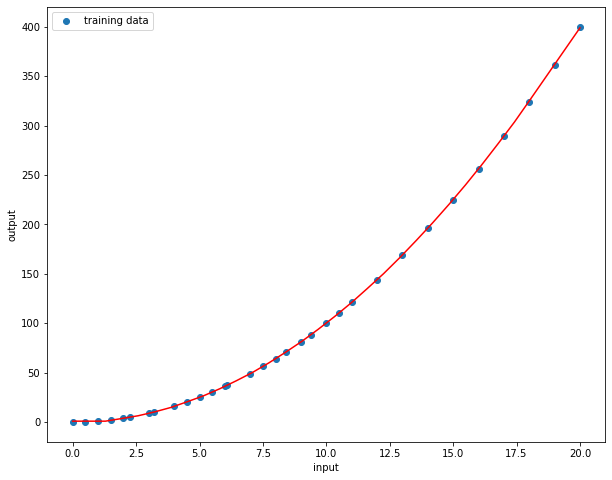

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.xlabel('input')
plt.ylabel('output')
plt.scatter(X, Y, label = "training data")
plt.legend()
plt.plot(np.linspace(0, 20, 32), Ypreds_2Dlist, c = 'r', label="predictions")